In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("hw09.ipynb")

# Homework 9:  Hypothesis Tests: v2

**Assigned Readings On These Topics from Class Schedule**: 

* [Testing Hypotheses](https://www.inferentialthinking.com/chapters/11/Testing_Hypotheses.html)

* [Comparing Two Samples](https://inferentialthinking.com/chapters/12/Comparing_Two_Samples.html)




## Due Date: Thursday Nov 2nd by 11:59 PM MT on Gradescope


## Collaboration Policy

Data science is a collaborative activity.  However a key step in learning and retention is **creating solutions on your own.**  

Below are examples of acceptable vs unacceptable use of resources and collaboration when doing HW assignments in CSCI 3022.


The following would be some **examples of cheating** when working on HW assignments in CSCI 3022.  Any of these constitute a **violation of the course's collaboration policy and will result in an F in the course and a trip to the honor council**.   


 - Consulting web pages that may have a solution to a given homework problem or one similar is cheating.  However, consulting the class notes, and web pages that explain the material taught in class but do NOT show a solution to the homework problem in question are permissible to view.  Clearly, there's a fuzzy line here between a valid use of resources and cheating. To avoid this line, one should merely consult the course notes, the course textbook, and references that contain syntax and/or formulas.
 - Copying a segment of code or math solution of three lines or more from another student from a printout, handwritten copy, or by looking at their computer screen 
 - Allowing another student to copy a segment of your code or math solution of three lines or more
 - Taking a copy of another student's work (or a solution found online) and then editing that copy
 - Reading someone else’s solution to a problem on the HW before writing your own.
 - Asking someone to write all or part of a program or solution for you.
 - Asking someone else for the code necessary to fix the error for you, other than for simple syntactical errors
 


On the other hand, the following are some **examples of things which would NOT usually be
considered to be cheating**:
 - Working on a HW problem on your own first and then discussing with a classmate a particular part in the problem solution where you are stuck.  After clarifying any questions you should then continue to write your solution independently.
 - Asking someone (or searching online) how a particular construct in the language works.
 - Asking someone (or searching online) how to formulate a particular construct in the language.
 - Asking someone for help in finding an error in your program.  
 - Asking someone why a particular construct does not work as you expected in a given program.
   

To test whether you are truly doing your own work and retaining what you've learned you should be able to easily reproduce from scratch and explain a HW solution that was your own when asked in office hours by a TA/Instructor or on a quiz/exam.   


If you have difficulty in formulating the general solution to a problem on your own, or
you have difficulty in translating that general solution into a program, it is advisable to see
your instructor or teaching assistant rather than another student as this situation can easily
lead to a, possibly inadvertent, cheating situation.

We are here to help!  Visit HW Hours and/or post questions on Piazza!


If while completing this assignment you reference any websites other than those linked in this assignment or provided on Canvas please list those references here:

**External references**:  *list any websites you referenced

#### Grading
Grading is broken down into autograded answers and manually graded answers. 

For autograded answers, the results of your code are compared to provided and/or hidden tests.

For manually graded answers you must show and explain all steps.  Graders will evaluate how well you answered the question and/or fulfilled the requirements of the question.


### Score breakdown



Question | Points | Grading Type
--- | --- | ---
Question 1 | 4 | manual
Question 2.1, 2.3, 2.5 | 9 | manual
Question 2.2, 2.4| 6 | autograded
Question 3 | 5 | manual
Question 4.1-4.7, 4.9 | 17 | autograded
Question 4.8, 4.10 | 9 | manual
|Total | 50

In [2]:

import pandas as pd
# These lines import the Numpy and Datascience modules.
import numpy as np
from matplotlib.ticker import PercentFormatter
# These lines do some fancy plotting magic.
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import warnings
warnings.simplefilter('ignore', FutureWarning)

from matplotlib import patches
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets

<!-- BEGIN QUESTION -->

<br>

---


## QUESTION 1  - Scientists vs. P-Values 
***

Read the following article AND watch the following video.  Then answer the following questions below.


 Step 1).  Read the following article from **FiveThirtyEight**:
     [Statisticians Found One Thing They Can Agree On: It's Time to Stop Misusing P-Values](http://fivethirtyeight.com/features/statisticians-found-one-thing-they-can-agree-on-its-time-to-stop-misusing-p-values/)
 
 Step 2).  Watch this video (11 min):  [P-Hacking](https://www.youtube.com/watch?v=Gx0fAjNHb1M)



**Based on the article:**

**Question 1.1.**  In what ways are scientists misusing p-values?   For full credit list **at least 3 ways**  mentioned in the article. 


**Question 1.2.**  What suggestions are made in the article to use them properly? 

**Based on the video:**

**Question 1.3.**  Suppose the null hypothesis is true.  If you're conducting multiple hypothesis tests at the 5% significance level, what's the minimum number of tests you need to do before it's more than 50% likely that at least one of the tests will incorrectly reject the null hypothesis?  Show work justifying your answer.   

**Question 1.4.**  What is the Bonferroni correction as described in the video?  Give an example from the video as to how it could be used. 

Answer all 4 parts in the same Markdown cell below:

**1.1:** One way that scientists are misusing p-values is that they believe p-values prove your hypothesis. This is not true. Instead, p-value is the probability of getting the data you observed based on your hypothesis. Another way that scientists are misuing p-values is that it tells you the probabilty of the results being true. Finally, scientists were misusing p-values to separate false findings from true findings by cherry picking their p-value to fit their data. 

**1.2:** The ASA recommended to rely on other measures like confidence intervals, but the overall goal is to move towards embracing uncertainty and variation.

**1.3:** Since each test is using the p-value of 5%, there is a 95% chance the data is not significant. Thus, the minimum number of tests you need to do before it's more than 50% likely that at least one of the tests will incorrectly reject the null is 13 tests. This is because the probability of having none of the 14 tests come up significant is $0.95^{14}=.4877$ and $(1-.4877)*100=51.23%$ of the time one or more of the tests will reject the null by chance.

**1.4:** The Bonferroni correction is instead of using the usual significance values to decide when results are significant or not, divide the significant value by the number of tests and use that as your p-value. 

In [3]:
1-.95**14

0.5123250208844705

<!-- END QUESTION -->

<br>

---

## Question 2: Using TVD as a Test Statistic

Before beginning this section, please read [this section](https://inferentialthinking.com/chapters/11/2/Multiple_Categories.html#a-new-statistic-the-distance-between-two-distributions) of the textbook on TVD!

**Total variation distance (TVD)** is a special type of test statistic that we use when we want to compare two distributions of *categorical data*. It is often used when we observe that a set of observed proportions/probabilities is different than what we expect under the null model. 

Consider a six-sided die that we roll 6,000 times. If the die is fair, we would expect that each face comes up $\frac{1}{6}$ of the time. By random chance, a fair die won't always result in equal proportions (that is, we won't get exactly 1,000 of each face). However, if we suspect that the die might be unfair based on the data, we can conduct a hypothesis test using TVD to compare the expected [$\frac{1}{6}$, $\frac{1}{6}$, $\frac{1}{6}$, $\frac{1}{6}$, $\frac{1}{6}$, $\frac{1}{6}$] distribution to what is actually observed.

In this part of the homework, we'll look at how we can use TVD to determine the effect that different factors have on happiness. 

We will be working with data from the [Gallup World Poll](https://www.gallup.com/analytics/349487/gallup-global-happiness-center.aspx#:~:text=World%20Happiness%20Report&text=Using%20the%20Gallup%20World%20Poll,about%20the%20World%20Happiness%20Report.) that is presented in the World Happiness Report, a survey of the state of global happiness. The survey ranked 155 countries by overall happiness and estimated the influence that economic production, social support, life expectancy, freedom, absence of corruption, and generosity had on population happiness. The study has been repeated for several years, but we'll be looking at data from the 2016 survey.

Run the cell below to load in the `happiness_scores` table.

In [4]:
happiness_scores = pd.read_csv("happiness_scores.csv")
happiness_scores.head(5)

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492


Participants in the study were asked to evaluate their life satisfaction from a scale of 0 (worst possible life) to 10 (best possible life). The responses for each country were averaged to create the `Happiness Score`.

The columns `Economy (GDP per Capita)`, `Family`, `Health (Life Expectancy)`, `Freedom`, `Trust (Government Corruption)`, and `Generosity` estimate the extent to which each factor influences happiness, both for better or for worse. The happiness score is the sum of these factors; the larger a factor is, the more it contributes to overall happiness. [In other words, if you add up all the factors (in addition to a "Difference from Dystopia" value we excluded in the dataset), you get the happiness score.]

Let's look at the different factors that affect happiness in the United States. Run the cell below to view the row in `us_happiness` that contains data for the United States.

In [5]:
us_happiness = happiness_scores.loc[happiness_scores["Country"] == "United States"]
us_happiness

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
12,United States,North America,13,7.104,7.02,7.188,1.50796,1.04782,0.779,0.48163,0.14868,0.41077


**To compare the different factors, we'll look at the proportion of the happiness score that is attributed to each variable. 
You can find these proportions in the table `us_happiness_factors` after running the cell below.**

*Note:* The factors shown in `us_happiness` don't add up exactly to the happiness score, so we adjusted the proportions to  only account for the data we have access to. The proportions were found by dividing each Happiness Factor value by the sum of all Happiness Factor values in `us_happiness`.

In [6]:
us_happiness_factors = pd.read_csv("us_happiness_factors.csv")
us_happiness_factors


,Happiness Factor,Proportion of Happiness Score
0,Economy (GDP per Capita),0.344609
1,Family,0.239455
2,Health (Life Expectancy),0.178022
3,Freedom,0.110065
4,Trust (Government Corruption),0.033977
5,Generosity,0.093872


<!-- BEGIN QUESTION -->

**Question 2.1.** Suppose we want to test whether or not each factor contributes the same amount to the overall Happiness Score. Define the null hypothesis, alternative hypothesis, and test statistic in the cell below. 

*Note:* Please format your answer as follows:
- Null Hypothesis: ...  
- Alternative Hypothesis: ...  
- Test Statistic: ...  


- Null Hypothesis: Each factor contributes the same amount to the overall Happiness Score
- Alternative Hypothesis: Each factor does not contribute the same amount to the overall Happiness Score
- Test Statistic: Total Variation Distance

<!-- END QUESTION -->

**Question 2.2.** Write a function `calculate_tvd` that takes in the observed distribution (`obs_dist`) and expected distribution under the null hypothesis (`null_dist`) and calculates the total variation distance. Use this function to set `observed_tvd` to be equal to the observed test statistic. 


In [7]:
null_distribution = np.ones(6) * (1/6)

def calculate_tvd(obs_dist, null_dist):
    return np.abs(obs_dist-null_dist).sum()/2
    
obs_dist = us_happiness_factors["Proportion of Happiness Score"]
observed_tvd = calculate_tvd(obs_dist, null_distribution)
observed_tvd

0.26208562431156396

In [8]:
grader.check("q2_2")

q2_2 results: All test cases passed!

<!-- BEGIN QUESTION -->

**Question 2.3.** Create an array called `simulated_tvds` that contains 10,000 simulated values under the null hypothesis. Assume that the original sample consisted of 1,000 individuals. 

Then plot a density histogram of your simulated test statistics, as well as a red dot representing the observed value of the test statistic.  Include a title and label your x and y axes.


Text(0.5, 0, 'Total Distance Variation')

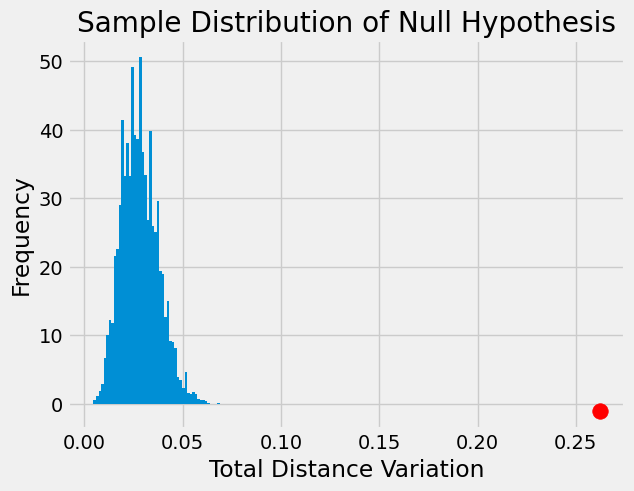

In [9]:
simulated_tvds = np.array([])
for i in range (10000):
    sample = np.random.multinomial(1000, null_distribution);
    sample_proportions = sample/1000
    simulated_tvds = np.append(simulated_tvds, calculate_tvd(sample_proportions, \
                                                             null_distribution))

plt.hist(simulated_tvds, bins=50, density=True)
# your code for the histogram above here.  The code below plots a red marker at the mean:
plt.scatter(observed_tvd, -1, marker='.', color='red', s=500)
plt.title("Sample Distribution of Null Hypothesis")
plt.ylabel("Frequency")
plt.xlabel("Total Distance Variation")
# your code above this line

In [10]:
grader.check("q2_3")

q2_3 results: All test cases passed!

<!-- END QUESTION -->

**Question 2.4** Use your simulated statistics to calculate the empirical p-value of your test. Make sure that this number is consistent with what you observed in the histogram above.


In [11]:
p_value_tvd = sum(simulated_tvds>=observed_tvd)/1000
p_value_tvd

0.0

In [12]:
grader.check("q2_4")

q2_4 results: All test cases passed!

<!-- BEGIN QUESTION -->

**Question 2.5.** What can you conclude about how each factor contributes to the overall happiness score in the US? Explain your answer using the results of your hypothesis test. Assume a significance level (i.e. p-value cutoff) of 5%. 


We can conclude that each factor does not contribute the same amount to the overall Happiness Score because the empirical p-value is 0 which is less than the significance level of 5%.

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<br>

---

## QUESTION 3:  A/B Tests

Answer all 4 parts to this question in the same Markdown cell below.  


**Question 3.1.**   When should you use an A/B test versus another kind of hypothesis test?

**Question 3.2.**   Kevin, a museum curator, has recently been given specimens of caddisflies collected
from various parts of Colorado. The scientists who collected the caddisflies
think that caddisflies collected at higher altitudes tend to be bigger. They tell him that
the average length of the 560 caddisflies collected at high elevation is 14mm, while the
average length of the 450 caddisflies collected from a slightly lower elevation is 12mm.
He’s not sure that this difference really matters, and thinks that this could just be the
result of chance in sampling.

 - **Question 3.2.a**  What’s an appropriate null hypothesis that Kevin can simulate under?


 - **Question 3.2.b**  How could you test the null hypothesis in the A/B test from above? What assumption would you make to test the hypothesis, and how would you simulate under that assumption?
 

 - **Question 3.2.c**  What would be a useful test statistic for the A/B test? Remember that the direction of your test statistic should come from the initial setting.

**3.1:** You should use an A/B test when you are comparing 2 samples compared to other hypothesis tests that are looking at 1 sample

**3.2a:** An appropriate null hypothesis that Kevin can simulate under is that there is no difference in size between caddisflies collected at higher altitudes and caddisflies collected at lower altitudes.

**3.2b:** To test the null hypothesis in the A/B test, you assume the distribution of both caddisflies at higher elevation and at lower elevation are the same and would use random permutations to simulate under the null hypothesis.

**3.2c:** A useful test statistic for the A/B test is difference between average length. If the difference is positive then it would mean higher elevation caddisflies are truly bigger.

<!-- END QUESTION -->

<br>

---

## Question 4: Deflategate

On January 18, 2015, the Indianapolis Colts and the New England Patriots played the American Football Conference (AFC) championship game to determine which of those teams would play in the Super Bowl. After the game, there were allegations that the Patriots' footballs had not been inflated as much as the regulations required; they were softer. This could be an advantage, as softer balls might be easier to catch.

For several weeks, the world of American football was consumed by accusations, denials, theories, and suspicions: the press labeled the topic Deflategate, after the Watergate political scandal of the 1970's. The National Football League (NFL) commissioned an independent analysis. In this example, we will perform our own analysis of the data.

Pressure is often measured in pounds per square inch (psi). NFL rules stipulate that game balls must be inflated to have pressures in the range 12.5 psi and 13.5 psi. Each team plays with 12 balls. Teams have the responsibility of maintaining the pressure in their own footballs, but game officials inspect the balls. Before the start of the AFC game, all the Patriots' balls were at about 12.5 psi. Most of the Colts' balls were at about 13.0 psi. However, these pre-game data were not recorded.

During the second quarter, the Colts intercepted a Patriots ball. On the sidelines, they measured the pressure of the ball and determined that it was below the 12.5 psi threshold. Promptly, they informed officials. 

At half-time, all the game balls were collected for inspection. Two officials, Clete Blakeman and Dyrol Prioleau, measured the pressure in each of the balls. 

Here are the data. Each row corresponds to one football. Pressure is measured in psi. The Patriots ball that had been intercepted by the Colts was not inspected at half-time. Nor were most of the Colts' balls – the officials simply ran out of time and had to relinquish the balls for the start of second half play.

In [13]:
football = pd.read_csv('deflategate.csv')
football

,Team,Blakeman,Prioleau
0,Patriots,11.50,11.80
1,Patriots,10.85,11.20
2,Patriots,11.15,11.50
3,Patriots,10.70,11.00
4,Patriots,11.10,11.45
5,Patriots,11.60,11.95
6,Patriots,11.85,12.30
7,Patriots,11.10,11.55
8,Patriots,10.95,11.35
9,Patriots,10.50,10.90


**Question 4.1.** For each of the 15 balls that were inspected, the two officials got different results. It is not uncommon that repeated measurements on the same object yield different results, especially when the measurements are performed by different people.

Add a new column to the  `football` dataframe called `Combined` where the entries are the average of the two measurements made for each ball.   Then drop the columns `Blakeman` and `Prioleau` from the `football` table.   


In [14]:
football["Combined"] = (football["Blakeman"]+football["Prioleau"])/2
football = football.drop(columns=["Blakeman", "Prioleau"])
# your code above this line

football

,Team,Combined
0,Patriots,11.650
1,Patriots,11.025
2,Patriots,11.325
3,Patriots,10.850
4,Patriots,11.275
5,Patriots,11.775
6,Patriots,12.075
7,Patriots,11.325
8,Patriots,11.150
9,Patriots,10.700


In [15]:
grader.check("q4_1")

q4_1 results: All test cases passed!

**Question 4.2.** At a glance, it seems apparent that the Patriots' footballs were at a lower pressure than the Colts' balls. Because some deflation is normal during the course of a game, the independent analysts decided to calculate the **drop in pressure** from the start of the game. Recall that the Patriots' balls had all started out at about 12.5 psi, and the Colts' balls at about 13.0 psi. 

Complete the cell below so that `avg_drop_for_colts` and `avg_drop_for_patriots` evaluates to average drops in pressure for the Colts and Patriots respectively.

Hint: Start by creating a new column **PressureDrop** and assign it the drop in pressure for each ball compared to the pressure at the start of the game. 

In [16]:
football["PressureDrop"] = football.apply(lambda row: 12.5 - row['Combined'] if row['Team'] == 'Patriots' \
                                          else 13 - row['Combined'], axis=1)

patriots = football[football["Team"] == "Patriots"]
colts = football[football["Team"] == "Colts"]
# Your code above this line

avg_drop_for_colts = colts["PressureDrop"].mean()
avg_drop_for_patriots = patriots["PressureDrop"].mean()

In [17]:
grader.check("q4_2")

q4_2 results: All test cases passed!

**Question 4.3.** 
The question now is why the Patriots' footballs had a larger drop in pressure, on average, than the Colts footballs. Could it be due to chance? 

How does chance come in here? Nothing was being selected at random. But we can make a chance model by hypothesizing that the 11 Patriots’ drops look like a random sample of 11 out of all the 15 drops, with the Colts’ drops being the remaining four.
That’s a completely specified chance model under which we can simulate data. So that's our null hypothesis.


Assign `alternative_statement_number` to the **number** next to the statement below that correctly describes the alternative hypothesis.  (For example, if you believe statement 1 is the correct alternative hypothesis, set `alternative_statement_number` = 1 in the code cell below).  Note that the check below just checks that your answer is in the correct form, it doesn't check if you have the correct answer (that will be done when you submit to Gradescope).


 1. There is no difference in the population distributions of pressure drops between all of the Patriots' balls and the Colts' balls.  Any difference observed in the random sample of balls measured at halftime was due to random chance.    

 2. The Patriots' pressure drops are too large, on average, to resemble a random sample drawn from all the drops. 
 
 3. The Patriots' pressure drops are too small, on average, to resemble a random sample drawn from all the drops.


In [18]:
alternative_statement_number = 2

In [19]:
grader.check("q4_3")

q4_3 results: All test cases passed!

**Question 4.4.** To test this hypothesis, let's follow our textbook's advice and choose a test statistic where the following statement is true: Large values of the test statistic favor the alternative hypothesis.

The correct test statistic for these hypotheses is one of the three options below. Which one is it? Assign the appropriate number to the variable `correct_test_stat`. 

1. "average pressure drop for Patriots - average pressure drop for Colts" 
2. "average pressure drop for Colts - average pressure drop for Patriots" 
3. "|average pressure drop for Patriots - average pressure drop for Colts|" 


In [20]:
correct_test_stat = 1
correct_test_stat

1

In [21]:
grader.check("q4_4")

q4_4 results: All test cases passed!

**Question 4.5.** Complete the cell below so that `observed_statistic_ab` evaluates to the observed value of the test statistic.  (The check below just checks that you have the correct format, not the correct actual value).

In [22]:
observed_statistic_ab = avg_drop_for_patriots - avg_drop_for_colts 

observed_statistic_ab

0.733522727272728

In [23]:
grader.check("q3_5")

q3_5 results: All test cases passed!

**Question 4.6.**  To simulate our null hypothesis we will use a permutation test. Assign `permutation_test_reason` to the number corresponding to the reason why we use a permutation test in this situation.  Again, the built-in tests in this notebook only check if your answer is in the correct format.


1. You can always use a permutation test, regardless of your null hypothesis. 


2. Under the null hypothesis then it shouldn't matter which footballs are labeled Patriots and which are labeled Colts. The distributions of the two sets of pressure drops would be the same. We can simulate this by randomly shuffling the team **labels** in the `football` table.


3. Under the null hypothesis then it shouldn't matter which footballs are labeled Patriots and which are labeled Colts. The distributions of the two sets of pressure drops would be the same. We can simulate this by randomly shuffling the **rows** in the `football` table.



In [24]:

permutation_test_reason = 2


In [25]:
grader.check("q4_6")

q4_6 results: All test cases passed!

**Question 4.7.** 

Create a new DataFrame `original_and_shuffled` that is a copy of the original `football` DataFrame, but that has an additional column **ShuffledLabel**  with shuffled Colts/Patriots labels.  

*Note:* Check out [12.1](https://inferentialthinking.com/chapters/12/1/AB_Testing.html#predicting-the-statistic-under-the-null-hypothesis) for a refresher on random permutations.


In [26]:
original_and_shuffled = football.copy()
shuffled_labels = football["Team"].sample(frac=1, replace=False).values
original_and_shuffled["ShuffledLabel"] = shuffled_labels
# Your code above this line

original_and_shuffled



,Team,Combined,PressureDrop,ShuffledLabel
0,Patriots,11.650,0.850,Patriots
1,Patriots,11.025,1.475,Colts
2,Patriots,11.325,1.175,Patriots
3,Patriots,10.850,1.650,Colts
4,Patriots,11.275,1.225,Patriots
5,Patriots,11.775,0.725,Patriots
6,Patriots,12.075,0.425,Patriots
7,Patriots,11.325,1.175,Patriots
8,Patriots,11.150,1.350,Colts
9,Patriots,10.700,1.800,Patriots


In [27]:
grader.check("q4_7")

q4_7 results: All test cases passed!

<!-- BEGIN QUESTION -->

**Question 4.8.** 

In the first cell below:

 - Define a function `simulate_one_statistic` that takes no arguments and returns one simulated value of the test statistic.  Refer to the code you have previously written in this problem, as you might be able to re-use some of it. 

In the 2nd cell below:

 - Complete the code to simulate 10,000 values of the statistic and store it in the array `simulated_statistics_ab`.

 - Then draw a density histogram with the empirical distribution of the statistic 
 
 - Include a red dot on your histogram at the value of `observed_statistic_ab`. 

 - Include a title for your histogram and label the x and y-axes.



In [35]:
def simulate_one_statistic():
    shuffled_labels = football["Team"].sample(frac=1, replace=False).values
    original_and_shuffled["ShuffledLabel"] = shuffled_labels
    
    patriots_shuffled = original_and_shuffled[original_and_shuffled["ShuffledLabel"] == \
                                              "Patriots"]
    colts_shuffled = original_and_shuffled[original_and_shuffled["ShuffledLabel"] == "Colts"]

    avg_drop_for_colts = colts_shuffled["PressureDrop"].mean()
    avg_drop_for_patriots = patriots_shuffled["PressureDrop"].mean()
    
    return avg_drop_for_patriots - avg_drop_for_colts 

# Your code above this line


simulate_one_statistic()



0.060227272727273684

Text(0.5, 0, 'Difference in Average Drop')

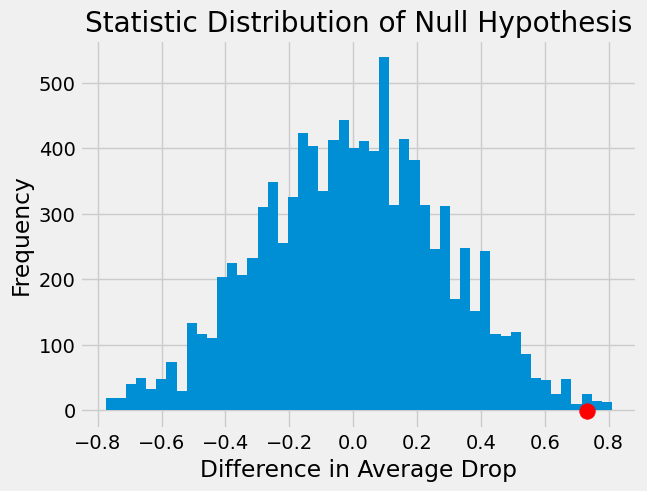

In [29]:
repetitions = 10000

simulated_statistics_ab = np.array([])

for i in range(repetitions):
    stat = simulate_one_statistic()
    simulated_statistics_ab = np.append(simulated_statistics_ab, stat)
    
plt.hist(simulated_statistics_ab, bins=50)
plt.scatter(observed_statistic_ab, -1, marker='.', color='red', s=500)
plt.title("Statistic Distribution of Null Hypothesis")
plt.ylabel("Frequency")
plt.xlabel("Difference in Average Drop")
# your code for histogram and observed statistic above this line


<!-- END QUESTION -->

**Question 4.9.** Use the simulation to find an empirical approximation to the p-value. Assign `p_val` to the appropriate p-value from this simulation. 

*Note:* Assume that we use the 5% significance cutoff for the p-value.


In [30]:
p_val = sum(simulated_statistics_ab>=observed_statistic_ab)/10000

p_val

0.0034

In [32]:
grader.check("q4_9")

q4_9 results: All test cases passed!

<!-- BEGIN QUESTION -->

**Question 4.10.**  What is the conclusion of your test? Explain what this means in the context of this particular problem.    Can we make any casual conclusions from this test?  Why or why not?

We can conclude that we reject the null hypothesis and accept the alternative hypothesis. This means that the Patriots' pressure drops are too large, on average, to resemble a random sample drawn from all the drops because the empirical p-value of .3% is less than the 5% significance cuttoff for the p-value. However, we cannot make any causal conclusions from this test because teams were not randomly assigned balls.

<!-- END QUESTION -->

In the actual case, the independent investigative team analyzed the data in several different ways, taking into account the laws of physics. The final report said,

“The average pressure drop of the Patriots game balls exceeded the average pressure drop of the Colts balls by 0.45 to 1.02 psi, depending on various possible assumptions regarding the gauges used, and assuming an initial pressure of 12.5 psi for the Patriots balls and 13.0 for the Colts balls.”  (Investigative report commissioned by the NFL regarding the AFC Championship game on January 18, 2015)

Our analysis shows an average pressure drop of about 0.73 psi, which is close to the center of the interval “0.45 to 1.02 psi” and therefore consistent with the official analysis.

But the all-important question in the football world was about causation: the question was whether the excess drop of pressure in the Patriots’ footballs was deliberate. If you are curious about the answer given by the investigators, here is the full report:
(https://www.wsj.com/public/resources/documents/Deflategate.pdf)


<br/><br/>
<hr style="border: 5px solid #003262;" />
<hr style="border: 1px solid #fdb515;" />

## Congratulations! You have finished Homework 9!

If you discussed this assignment with any other students in the class (in a manner that is acceptable as described by the Collaboration policy above) please **include their names** here:

**Collaborators**: N/A

### Submission Instructions

Before proceeding any further, **save this notebook.**

After running the `grader.export()` cell provided below, **2 files will be created**: a zip file and pdf file.  You can download them using the links provided below OR by finding them in the same folder where this juptyer notebook resides in your JuptyerHub.

To receive credit on this assignment, **you must submit BOTH of these files
to their respective Gradescope portals:** 

* **Homework 8 Autograded**: Submit the zip file that is output by the `grader.export()` cell below to the HW9 Autograded assignment in Gradescope.

* **Homework 8 Manually Graded**: Submit your hw09.PDF to the HW9 Manually Graded assignment in Gradescope.  **YOU MUST SELECT THE PAGES CORRESPONDING TO EACH QUESTION WHEN YOU UPLOAD TO GRADESCOPE.  IF NOT, YOU WILL LOSE POINTS**   Also, **check** that all of your plots **and** all lines of your code are showing up in your PDF before submitting.  If not, you will not receive credit for your plots/code.  


**You are responsible for ensuring your submission follows our requirements. We will not be granting regrade requests nor extensions to submissions that don't follow instructions.** If you encounter any difficulties with submission, please don't hesitate to reach out to staff prior to the deadline.

## Submission

Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output. The cell below will generate a zip file for you to submit. **Please save before exporting!**

AFTER running the cell below, click on <a href='hw09.pdf' download>this link to download the PDF </a> to upload to Gradescope.  There will be a separate link that appears after running the cell below with a link to download the zip file to upload to Gradescope.

In [36]:
# Save your notebook first, then run this cell to export your submission.
grader.export(run_tests=True)

Running your submission against local test cases...



Your submission received the following results when run against available test cases:

    q2_2 results: All test cases passed!

    q2_3 results: All test cases passed!

    q2_4 results: All test cases passed!

    q4_1 results: All test cases passed!

    q4_2 results: All test cases passed!

    q4_3 results: All test cases passed!

    q4_4 results: All test cases passed!

    q3_5 results: All test cases passed!

    q4_6 results: All test cases passed!

    q4_7 results: All test cases passed!

    q4_9 results: All test cases passed!
